Nama : Erin Nur Fatimah

ID : M515Y1092

Alamat : Sindet RT 003, Wukirsari, Imogiri, Bantul, Yogyakarta

# Data Loading

### Mengimport drive ke google colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Mengimport Library yang Dibutuhkan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from pathlib import Path
import seaborn as sns
from sklearn.model_selection import train_test_split

# **Data Understanding**

## Memuat Data pada sebuah Dataframe menggunakan pandas

In [3]:
books = pd.read_csv('/content/drive/MyDrive/data set/data set proyek 2/book_recommender/Books.csv')
ratings = pd.read_csv('/content/drive/MyDrive/data set/data set proyek 2/book_recommender/Ratings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Mengambil data buku dan rating yang digunakan masing-masing sebanyak 14000

In [4]:
dt_books = books.iloc[:14000]
dt_ratings = ratings.iloc[:14000]

len(dt_books)
len(dt_ratings)

14000

Mengubah "-" menjadi "_" agar mempermudah proses pemanggilan

In [5]:
dt_books.columns = books.columns.str.lower()
dt_ratings.columns = ratings.columns.str.lower()

dt_books.columns = books.columns.str.replace("-","_")
dt_ratings.columns = ratings.columns.str.replace("-","_")

# **Univariate**

## Book Variabel

### Membuat kolom type pada dataset

In [6]:
dt_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 14000 non-null  object
 1   Book_Title           14000 non-null  object
 2   Book_Author          14000 non-null  object
 3   Year_Of_Publication  14000 non-null  object
 4   Publisher            14000 non-null  object
 5   Image_URL_S          14000 non-null  object
 6   Image_URL_M          14000 non-null  object
 7   Image_URL_L          14000 non-null  object
dtypes: object(8)
memory usage: 875.1+ KB


In [7]:
print('Jumlah Buku berdasar Rating: ', len(dt_ratings.ISBN.unique()))
print('Jumlah Buku berdasar Daftar Buku: ', len(dt_books.ISBN.unique()))

Jumlah Buku berdasar Rating:  12512
Jumlah Buku berdasar Daftar Buku:  14000


Menghapus 3 kolom pada 'data_books' karena tidak akan digunakan

In [8]:
dt_books.drop(['Image_URL_S', 'Image_URL_M', 'Image_URL_L' ], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Mengubah kolom 'Year_Of_Publication' yang semula bertipe object menjadi integer

In [9]:
dt_books['Year_Of_Publication'] = pd.to_numeric(dt_books['Year_Of_Publication'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
dt_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 14000 non-null  object
 1   Book_Title           14000 non-null  object
 2   Book_Author          14000 non-null  object
 3   Year_Of_Publication  14000 non-null  int64 
 4   Publisher            14000 non-null  object
dtypes: int64(1), object(4)
memory usage: 547.0+ KB


## Ratings Variabel

### Melihat data pada variabel rating dengan fungsi head()

In [11]:
dt_ratings.head()

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Melihat Distribusi Rating

In [12]:
dt_ratings.describe()

,User_ID,Book_Rating
count,14000.000000,14000.000000
mean,190185.459429,2.477857
std,128946.968404,3.694424
min,2.000000,0.000000
25%,1517.000000,0.000000
50%,277639.000000,0.000000
75%,278418.000000,6.000000
max,278854.000000,10.000000


### Melihat berapa pengguna yang memberikan rating, jumlah ISBN, dan jumlah rating

In [13]:
print('Jumlah user_ID: ', len(dt_ratings.User_ID.unique()))
print('Jumlah ISBN: ', len(dt_ratings.ISBN.unique()))
print('Jumlah data rating: ', len(dt_ratings))

Jumlah user_ID:  1543
Jumlah ISBN:  12512
Jumlah data rating:  14000


# Data Preprocesing

## Menggabungkan dt_books dan dt_ratings

In [17]:
dt = dt_ratings.merge(dt_books, left_on = 'ISBN', right_on = 'ISBN')
dt

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
2,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,638,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
4,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
...,...,...,...,...,...,...,...
4851,2010,0399147357,7,Dead Sleep,Greg Iles,2001,G. P. Putnam's Sons
4852,2010,0440221420,5,No Witnesses: A Novel,Ridley Pearson,1996,Island
4853,2010,0451197879,8,Roadwork,Richard Bachman,1999,Signet Book
4854,2010,0553573977,0,The Hancock Boys,Thomas William Simpson,2000,Bantam Books


In [18]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4856 entries, 0 to 4855
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User_ID              4856 non-null   int64 
 1   ISBN                 4856 non-null   object
 2   Book_Rating          4856 non-null   int64 
 3   Book_Title           4856 non-null   object
 4   Book_Author          4856 non-null   object
 5   Year_Of_Publication  4856 non-null   int64 
 6   Publisher            4856 non-null   object
dtypes: int64(3), object(4)
memory usage: 303.5+ KB


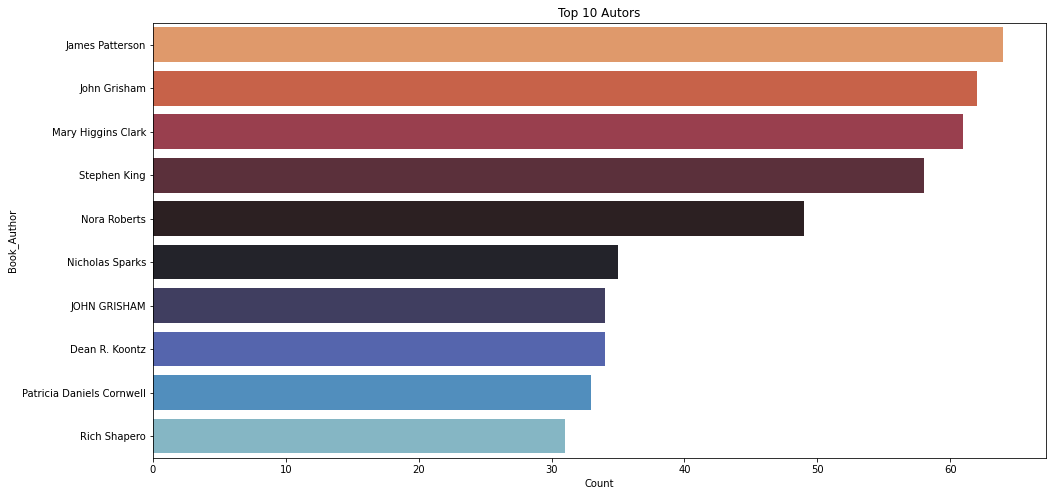

In [60]:
most_author = dt.Book_Author.value_counts().reset_index()
most_author.columns = ['Book_Author','count']

plt.figure(figsize = (16,8))
plt.title("Top 10 Autors")
sns.barplot(x = 'count', y = 'Book_Author', data = most_author.head(10), palette='icefire_r');
plt.ylabel('Book_Author')
plt.xlabel('Count')
plt.show()

# **Data Preparation**

## Mengatasi Missing Value

Menghitung jumlah data kosong pada setiap kolom

In [21]:
dt_books.isnull().sum()

ISBN                   0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
dtype: int64

In [22]:
dt_ratings.isnull().sum()

User_ID        0
ISBN           0
Book_Rating    0
dtype: int64

In [23]:
dt.isnull().sum()

User_ID                0
ISBN                   0
Book_Rating            0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
dtype: int64

## Membuat variabel bernama preparation

In [25]:
preparation = dt
preparation.sort_values('ISBN')

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher
2562,8,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2683,190,0002740230,7,Keep It Simple: And Get More Out of Life,Nick Page,1999,Trafalgar Square
3792,901,0006276199,0,Alien at St Wilfred's,Adrian Plass,1999,Zondervan
3895,1025,000636988X,9,How Not to Be a Perfect Mother: The Crafty Mot...,Libby Purves,1986,HarperCollins Publishers
3793,901,000649840X,9,Angelas Ashes,Frank Mccourt,0,Harpercollins Uk
...,...,...,...,...,...,...,...
1089,277509,9724115380,9,A hora de SertÃ³rio (Finisterra),JoÃ£o Aguiar,1994,EdiÃ§Ãµes ASA
2665,160,9724119378,0,O Deus Das Pequenas Coisas,Roy,1998,Edicoes Asa
629,277272,9726101794,4,As mulheres deviam vir com livro de instruÃ§Ãµ...,Manuel Jorge Marmelo,1999,Campo das Letras
217,276925,9871138016,0,Cronica De Una Muerte Anunciada,Gabriel Marques Garcia,2002,Debols!llo


## Membuang data duplikat pada variabel preparation dengan fungsi drop_duplicates()

In [26]:
preparation = preparation.drop_duplicates('ISBN')
preparation

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
4,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday
6,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group
9,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books
...,...,...,...,...,...,...,...
4851,2010,0399147357,7,Dead Sleep,Greg Iles,2001,G. P. Putnam's Sons
4852,2010,0440221420,5,No Witnesses: A Novel,Ridley Pearson,1996,Island
4853,2010,0451197879,8,Roadwork,Richard Bachman,1999,Signet Book
4854,2010,0553573977,0,The Hancock Boys,Thomas William Simpson,2000,Bantam Books


## Melakukan konversi data series menjadi list

In [27]:
books_id = preparation['ISBN'].tolist()
books_title = preparation['Book_Title'].tolist()
books_author = preparation['Book_Author'].tolist()
 
print(len(books_id))
print(len(books_title))
print(len(books_author))

3622
3622
3622


## Membuat dictionary untuk menentukan pasangan key-value pada data books_id, books_title, dan books_author

In [28]:
books_new = pd.DataFrame({
    'id': books_id,
    'title':books_title,
    'author': books_author
})
books_new

,id,title,author
0,034545104X,Flesh Tones: A Novel,M. J. Rose
1,0446520802,The Notebook,Nicholas Sparks
2,038550120X,A Painted House,JOHN GRISHAM
3,0425115801,Lightning,Dean R. Koontz
4,0449006522,Manhattan Hunt Club,JOHN SAUL
...,...,...,...
3617,0399147357,Dead Sleep,Greg Iles
3618,0440221420,No Witnesses: A Novel,Ridley Pearson
3619,0451197879,Roadwork,Richard Bachman
3620,0553573977,The Hancock Boys,Thomas William Simpson


# **Model Development dengan Content Based Filtering**

## Assign dataframe dari tahap sebelumnya ke dalam variabel data

In [29]:
data = books_new
data.sample(5)

,id,title,author
3605,0486243451,The Book of Kells: Selected Plates in Full Color,Blanche Cirker
3320,0140265686,Out to Canaan (The Mitford Years),Jan Karon
2250,156341029X,Stone Butch Blues,Leslie Feinberg
1448,0316184152,Final Harvest : Poems,Emily Dickinson
850,0446525774,Saving Faith,David Baldacci


## TF-IDF Vectorizer

### Menggunakan fungsi tfidfvectorizer() dari library sklearn

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data title
tf.fit(books_new['title']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '01',
 '02',
 '10',
 '100',
 '1000',
 '101',
 '1022',
 '105',
 '11',
 '1116',
 '11th',
 '12',
 '122',
 '1229',
 '1232',
 '13',
 '1382',
 '14',
 '1408',
 '1414',
 '148',
 '15',
 '150',
 '153',
 '1558',
 '1569',
 '16',
 '1620',
 '1690',
 '1696',
 '1698',
 '17',
 '1774',
 '18',
 '1825',
 '1847',
 '1848',
 '1863',
 '1869',
 '1880',
 '1902',
 '1903',
 '1914',
 '1917',
 '1918',
 '1920',
 '1926',
 '1927',
 '1929',
 '1934',
 '1941',
 '1953',
 '1960',
 '1963',
 '1970',
 '1981',
 '1984',
 '1987',
 '1994',
 '1997',
 '1st',
 '20',
 '2000',
 '2002',
 '2061',
 '20th',
 '21st',
 '22',
 '23',
 '2348',
 '24',
 '25',
 '253',
 '26',
 '273',
 '29',
 '2nd',
 '30',
 '3000',
 '3111',
 '32',
 '33',
 '35',
 '37th',
 '3rd',
 '40',
 '42',
 '43',
 '439',
 '43rd',
 '44',
 '45',
 '451',
 '461',
 '48',
 '4th',
 '50',
 '501',
 '50th',
 '517',
 '54',
 '558',
 '562',
 '580',
 '5th',
 '60',
 '607',
 '614',
 '651',
 '654',
 '677',
 '6th',
 '729',
 '75',
 '75th',
 '767',
 '807',
 '828',
 '831',
 '835',
 '8

### Melakukan fit dan transformasi ke dalam bentuk matriks

In [32]:
tfidf_matrix = tf.fit_transform(books_new['title']) 
tfidf_matrix.shape 

(3622, 5478)

### Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()

In [33]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Matriks tf-idf untuk beberapa Books (title) dan author

In [34]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.author
).sample(22, axis=1).sample(10, axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,selfish,allegory,fodor,catnap,quilt,rimbauer,bersetzg,voice,unknown,forward,...,anubis,allegra,emperor,improving,wonderland,lazarus,autentica,center,crown,blacks
author,,,,,,,,,,,,,,,,,,,,,
Rich Shapero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Louise Fitzhugh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Joseph M. Williams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Erik Weihenmayer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Carol Smith,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sigmund Freud,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jean Giraudoux,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L.M. MONTGOMERY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Don Miguel Ruiz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Similarity

### Menggunakan fungsi cosine_similarity dari library sklearn

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.04209994,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.04209994, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

### Membuat dataframe dari variabel cosine_sim_df dengan baris dan kolom berupa author

In [36]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=books_new['author'], columns=books_new['author'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (3622, 3622)


author,Ann Rule,Norman Jetmundsen,David Baldacci,Dawn Chipman,Robert Hendrickson
author,,,,,
PHILIP PULLMAN,0.0,0.021195,0.0,0.0,0.000000
Elizabeth George,0.0,0.000000,0.0,0.0,0.000000
Susan Cooper,0.0,0.000000,0.0,0.0,0.000000
Leil Lowndes,0.0,0.012655,0.0,0.0,0.020753
Douglas Adams,0.0,0.049580,0.0,0.0,0.000000
Brian Jacques,0.0,0.000000,0.0,0.0,0.000000
PHILIP PULLMAN,0.0,0.021516,0.0,0.0,0.000000
Patricia Daniels Cornwell,0.0,0.000000,0.0,0.0,0.000000
Joseph Girzone,0.0,0.022491,0.0,0.0,0.000000


## Mendapatkan Rekomendasi

In [64]:
def books_recommendations(Books_Author, similarity_data=cosine_sim_df, items=books_new[['title', 'author']], k=5):
   
    index = similarity_data.loc[:,Books_Author].to_numpy().argpartition(
        range(-1, -k, -1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(Books_Author, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [42]:
books_new[books_new.author.eq('Robert Hendrickson')]

,id,title,author
1465,1575663937,More Cunning Than Man: A Social History of Rat...,Robert Hendrickson


### Mendapatkan rekomendasi Buku yang mirip dengan Robert Hendrickson

In [65]:
books_recommendations('Robert Hendrickson')

,author,title
0,Tony Parsons,Man and Boy: A Novel
1,Tony Parsons,Man and Boy
2,Tony Parsons,Man and Boy: A Novel
3,Tony Parsons,Man and Boy
4,Suzanne Simmons,Lady's Man


# **Model Development dengan Collaborative Filtering**

## Membaca dataset

In [44]:
data = dt_ratings
data

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
13995,2010,0449006522,0
13996,2010,0451197879,8
13997,2010,0553573977,0
13998,2010,0671024248,0


## Menyandikan (encode) fitur User_ID dan ISBN ke dalam indeks integer

In [45]:
# Mengubah UserID menjadi list tanpa nilai yang sama
user_ids = data['User_ID'].unique().tolist()
print('list User_ID: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_ID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke UserID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_ID: ', user_encoded_to_user)

list User_ID:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 

## Melakukan Proses Encoding Pada ISBN

In [46]:
book_ids = data['ISBN'].unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

## Petakan User_ID dan ISBN ke dataframe yang berkaitan

In [47]:
# Mapping userID ke dataframe user
data['user'] = data['User_ID'].map(user_to_user_encoded)
 
# Mapping ISBN ke dataframe book
data['book'] = data['ISBN'].map(book_to_book_encoded)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## Cek beberapa hal dalam data seperti jumlah user, jumlah ISBN, dan mengubah nilai ratings menjadi float

In [48]:
num_users = len(user_to_user_encoded)
print(num_users)
 
num_book = len(book_encoded_to_book)
print(num_book)
 
# Mengubah rating menjadi nilai float
data['Book_Rating'] = data['Book_Rating'].values.astype(np.float32)
 
min_rating = min(data['Book_Rating'])
max_rating = max(data['Book_Rating'])
 
print('Number of User: {}, Number of ISBN: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

1543
12512
Number of User: 1543, Number of ISBN: 12512, Min Rating: 0.0, Max Rating: 10.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Membagi Data untuk Training dan Validasi

### Mengacak dataset

In [49]:
data = data.sample(frac=1, random_state=42)
data

,User_ID,ISBN,Book_Rating,user,book
2900,277814,0440995779,0.0,419,2752
3143,277938,0451184734,8.0,482,2981
8231,278418,082175369X,0.0,678,7789
3855,278188,0425180964,0.0,587,3623
8045,278418,0803682085,0.0,678,7605
...,...,...,...,...,...
5191,278418,0373074050,0.0,678,4870
13418,1733,0373835426,7.0,1450,12037
5390,278418,0373121962,0.0,678,5066
860,277087,8472230082,5.0,139,850


### Membagi data train dan validasi dengan komposisi 80:20

In [50]:
x = data[['user', 'book']].values
y = data['Book_Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * data.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 419 2752]
 [ 482 2981]
 [ 678 7789]
 ...
 [ 678 5066]
 [ 139  850]
 [ 678 6857]] [0.  0.8 0.  ... 0.  0.5 0. ]


# Proses Training

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( 
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.book_embedding = layers.Embedding( 
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) 
    user_bias = self.user_bias(inputs[:, 0]) 
    book_vector = self.book_embedding(inputs[:, 1]) 
    book_bias = self.book_bias(inputs[:, 1]) 
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) 

# Evaluation 

## Melakukan proses compile terhadap model

In [52]:
model = RecommenderNet(num_users, num_book, 50) 
 
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

## Memulai proses training dengan batch size sebesar 8 serta epoch 25 kali

In [53]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 25,
    validation_data = (x_val, y_val)
)

Epoch 1/25
1400/1400 [==============================] - 15s 10ms/step - loss: 0.6142 - root_mean_squared_error: 0.4024 - val_loss: 0.5510 - val_root_mean_squared_error: 0.3644
Epoch 2/25
1400/1400 [==============================] - 14s 10ms/step - loss: 0.4732 - root_mean_squared_error: 0.3253 - val_loss: 0.5091 - val_root_mean_squared_error: 0.3424
Epoch 3/25
1400/1400 [==============================] - 13s 10ms/step - loss: 0.4453 - root_mean_squared_error: 0.3101 - val_loss: 0.4792 - val_root_mean_squared_error: 0.3292
Epoch 4/25
1400/1400 [==============================] - 15s 11ms/step - loss: 0.4207 - root_mean_squared_error: 0.2962 - val_loss: 0.4630 - val_root_mean_squared_error: 0.3227
Epoch 5/25
1400/1400 [==============================] - 13s 10ms/step - loss: 0.4051 - root_mean_squared_error: 0.2863 - val_loss: 0.4534 - val_root_mean_squared_error: 0.3188
Epoch 6/25
1400/1400 [==============================] - 13s 10ms/step - loss: 0.3929 - root_mean_squared_error: 0.2783 -

## Visualisasi Metrik

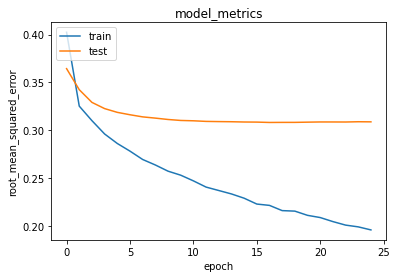

In [54]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Mendapatkan Rekomendasi Buku

In [55]:
book_df = books_new
 
User_ID = data.User_ID.sample(1).iloc[0]
book_visited_by_user = data[data.User_ID == User_ID]
 
book_not_visited = book_df[~book_df['id'].isin(book_visited_by_user.ISBN.values)]['id'] 
book_not_visited = list(
    set(book_not_visited)
    .intersection(set(book_to_book_encoded.keys()))
)
 
book_not_visited = [[book_to_book_encoded.get(x)] for x in book_not_visited]
user_encoder = user_to_user_encoded.get(User_ID)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_visited), book_not_visited)
)

## Memperoleh rekomendasi buku menggunakan fungsi model.predict() dari library Keras

In [66]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(User_ID))
print('===' * 12)
 
top_book_user = (
    book_visited_by_user.sort_values(
        by = 'Book_Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = book_df[book_df['id'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.title, ':', row.author)
 
print('----' * 12)
print('Top 10 books recommendation')
print('----' * 12)
 
recommended_book = book_df[book_df['id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.title, ':', row.author)

114/114 [==============================] - 0s 1ms/step
Showing recommendations for users: 277351
------------------------------------------------
Top 10 books recommendation
------------------------------------------------
The Watsons Go to Birmingham - 1963 (Yearling Newbery) : CHRISTOPHER PAUL CURTIS
To Kill a Mockingbird : Harper Lee
The Bell Jar : A Novel (Perennial Classics) : Sylvia Plath
Heat and Dust : Ruth Prawer Jhabvala
The Secret Life of Bees : Sue Monk Kidd
Rebecca : Daphne Du Maurier
Chicken Soup for the Soul (Chicken Soup for the Soul) : Jack Canfield
Angela's Ashes: A Memoir : Frank McCourt
The Demon-Haunted World: Science As a Candle in the Dark : Carl Sagan
Memoirs of a Geisha Uk : Arthur Golden
